In [1]:
import pandas as pd

In [8]:
binary_df = pd.read_excel("CleanedDataForMachineLearning.xlsx", engine="openpyxl" )
anc2vec_df = pd.read_excel("Anc2vecCleanedDataForMachineLearning.xlsx", engine="openpyxl" )
anc2vec_df.drop(columns=['UniprotAC', 'GeneID', 'Label'], inplace=True)

In [9]:
print(binary_df)

       UniprotAC     GeneID     Label  GO:0005634  GO:0005829  GO:0005654  \
0         F1T0I5         15  Positive           0           1           0   
1         Q16613         15  Positive           0           1           0   
2         P49588         16  Positive           0           1           0   
3         B2RUU2         19  Positive           0           0           0   
4         O95477         19  Positive           0           0           0   
...          ...        ...       ...         ...         ...         ...   
9112  A0A1X9RU27  100132074  Positive           1           0           0   
9113      B7U540  100134444  Positive           0           0           0   
9114  A0A024R7K5  100271849  Positive           0           1           1   
9115      Q02080  100271849  Positive           1           1           1   
9116      Q9Y575  100302652  Positive           0           1           0   

      GO:0005737  GO:0005886  GO:0005524  GO:0016020  ...  GO:0005295  \
0 

In [10]:
print(anc2vec_df)

      Embed #1  Embed #2  Embed #3  Embed #4  Embed #5  Embed #6  Embed #7  \
0    -0.249708 -0.579404  0.265524  0.311101 -0.841285 -0.808182 -0.203269   
1     0.488304 -1.189150  0.009883  0.134613 -0.242689 -0.078151 -0.039331   
2     3.913701 -0.807830  1.482768  1.504646 -0.312897  0.591516  1.536289   
3     0.482359 -1.366891  1.511907  0.301121 -0.398654 -0.931418 -0.538513   
4     6.387510 -4.170915  1.358583  0.622022 -1.891621 -1.393230 -1.190815   
...        ...       ...       ...       ...       ...       ...       ...   
9112  0.685031  0.379135  0.326327  0.100054 -1.259277  0.273659  0.464096   
9113 -0.262584 -0.153741 -0.312086 -0.354917  0.377118 -0.553173  0.215756   
9114  1.460721 -0.266339  1.693269  1.296659  0.429151  0.377611  0.439816   
9115  1.901668 -1.303669  2.207054  2.427063 -1.019305  0.651426  0.490482   
9116  1.047754  0.632366  0.598868  0.279357 -0.555671 -0.001850  0.066101   

      Embed #8  Embed #9  Embed #10  ...  Embed #191  Embed #19

In [11]:
concatenated_df = pd.concat([binary_df, anc2vec_df], ignore_index=False, axis = 1 )

In [12]:
print(concatenated_df)

       UniprotAC     GeneID     Label  GO:0005634  GO:0005829  GO:0005654  \
0         F1T0I5         15  Positive           0           1           0   
1         Q16613         15  Positive           0           1           0   
2         P49588         16  Positive           0           1           0   
3         B2RUU2         19  Positive           0           0           0   
4         O95477         19  Positive           0           0           0   
...          ...        ...       ...         ...         ...         ...   
9112  A0A1X9RU27  100132074  Positive           1           0           0   
9113      B7U540  100134444  Positive           0           0           0   
9114  A0A024R7K5  100271849  Positive           0           1           1   
9115      Q02080  100271849  Positive           1           1           1   
9116      Q9Y575  100302652  Positive           0           1           0   

      GO:0005737  GO:0005886  GO:0005524  GO:0016020  ...  Embed #191  \
0 

In [13]:
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_predict, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import label_binarize, LabelEncoder

In [14]:
X = concatenated_df.iloc[:, 3:].values.tolist()
print(concatenated_df['Label'])
Y = concatenated_df['Label'].tolist()
print(Y[4])

0       Positive
1       Positive
2       Positive
3       Positive
4       Positive
          ...   
9112    Positive
9113    Positive
9114    Positive
9115    Positive
9116    Positive
Name: Label, Length: 9117, dtype: object
Positive


In [15]:
label_encoder = LabelEncoder()
y_binary = label_encoder.fit_transform(Y)

In [16]:
cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

In [23]:
random_forest = RandomForestClassifier()
L1 = LogisticRegression(penalty = 'l1', solver = 'liblinear')
logistic_regression = LogisticRegression(max_iter = 1000)
ridge_regression = Ridge()

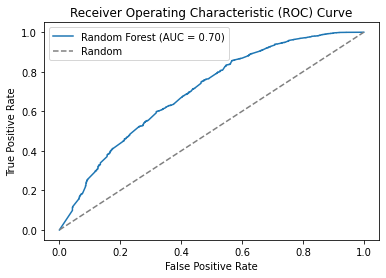

In [18]:
rf_probs = cross_val_predict(random_forest, X, y_binary, cv=cv, method='predict_proba')[:, 1]  

rf_fpr, rf_tpr, _ = roc_curve(y_binary, rf_probs)
rf_auc = auc(rf_fpr, rf_tpr)

plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


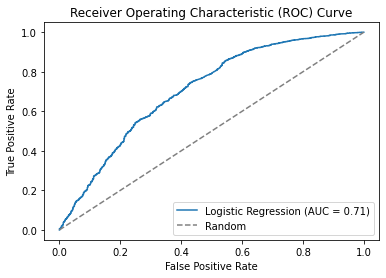

In [19]:
lr_probs = cross_val_predict(logistic_regression, X, y_binary, cv=cv, method='predict_proba')[:, 1]  

lr_fpr, lr_tpr, _ = roc_curve(y_binary, lr_probs)
lr_auc = auc(lr_fpr, lr_tpr)

plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

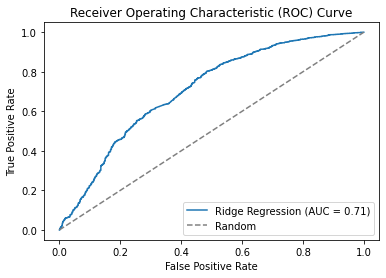

In [20]:
ridge_probs = cross_val_predict(ridge_regression, X, y_binary, cv=cv)
ridge_fpr, ridge_tpr, _ = roc_curve(y_binary, ridge_probs)
ridge_auc = auc(ridge_fpr, ridge_tpr)


plt.plot(ridge_fpr, ridge_tpr, label=f'Ridge Regression (AUC = {ridge_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

plt.show()

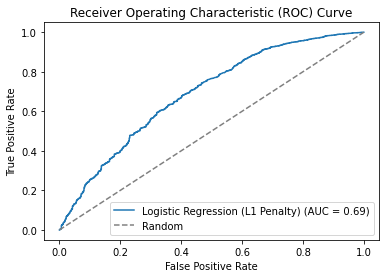

In [24]:
l1_probs = cross_val_predict(L1, X, y_binary, cv=cv, method='predict_proba')[:, 1]  

l1_fpr, l1_tpr, _ = roc_curve(y_binary, l1_probs)
l1_auc = auc(l1_fpr, l1_tpr)

plt.plot(l1_fpr, l1_tpr, label=f'Logistic Regression (L1 Penalty) (AUC = {l1_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

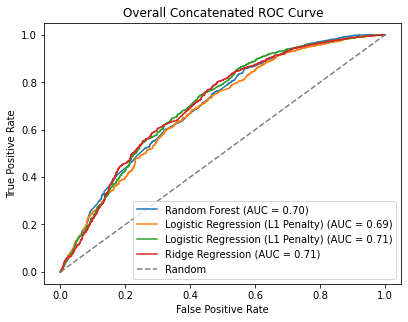

In [25]:
plt.figure(figsize=(6.4, 4.8))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(l1_fpr, l1_tpr, label=f'Logistic Regression (L1 Penalty) (AUC = {l1_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (L2 Penalty) (AUC = {lr_auc:.2f})')
plt.plot(ridge_fpr, ridge_tpr, label=f'Ridge Regression (AUC = {ridge_auc:.2f})')


plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Overall Concatenated ROC Curve')
plt.legend()
plt.savefig('ConcatenatedOverall.png', bbox_inches='tight', facecolor='white', transparent=False, dpi=600)
plt.show()
